<a href="https://colab.research.google.com/github/segzy01/Oluwasegun-Durowoju-Prework/blob/master/Airline_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import sklearn

In [ ]:
dataset = pd.read_csv('project_dataset_copy.csv')
dataset.head(n=5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Buy ticket in future
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,No
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,No
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,Yes
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,No
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,Yes


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

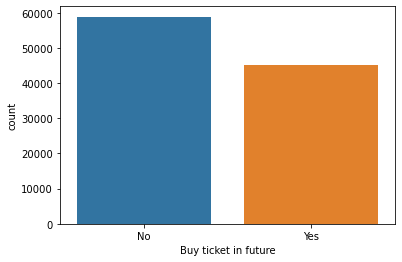

In [ ]:
import seaborn as sns
sns.countplot(dataset['Buy ticket in future'])
plt.show()

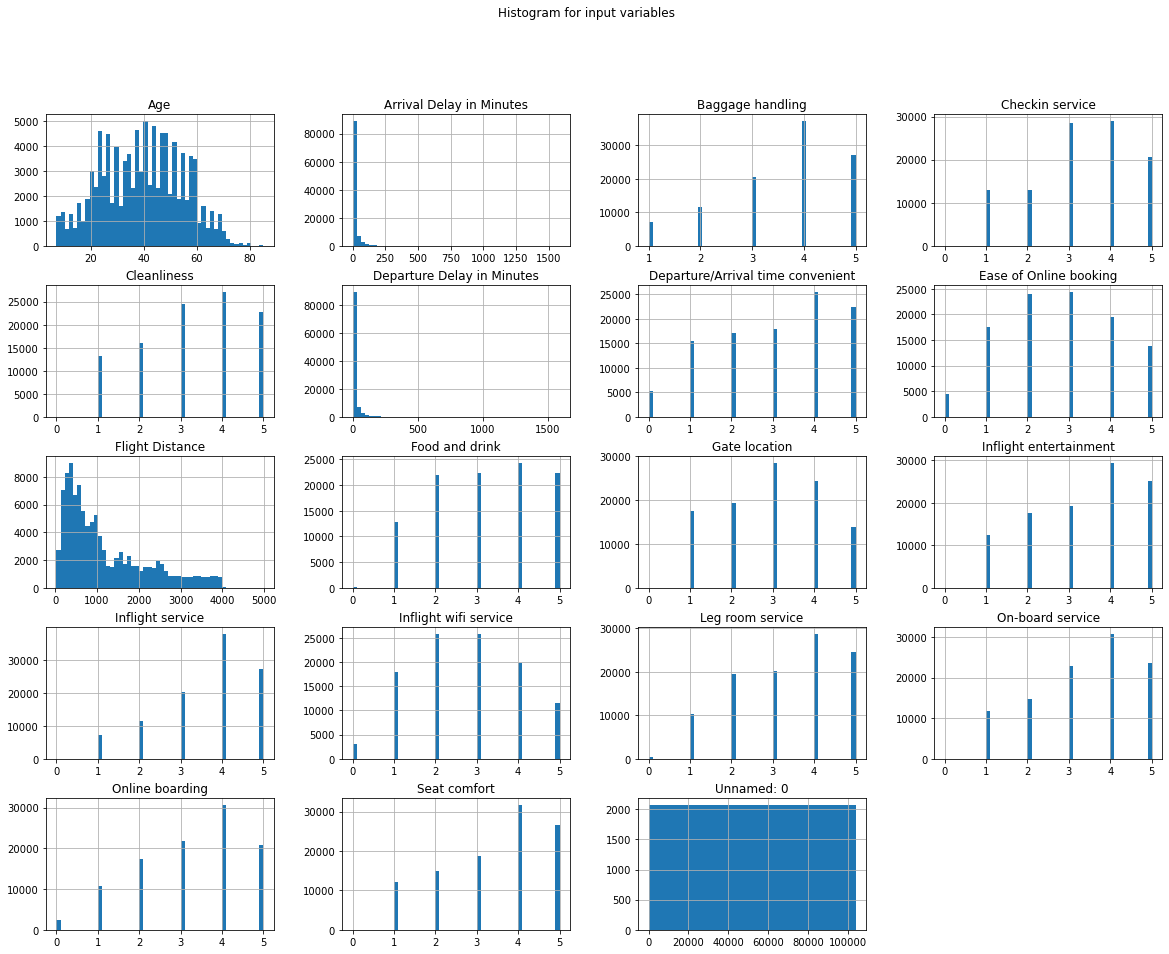

In [ ]:
import pylab as pl
dataset.drop(['id', 'Customer Type', 'Type of Travel', 'Class', 'Buy ticket in future', ],
            axis = 1).hist(bins = 50, figsize = (20,15))
pl.suptitle("Histogram for input variables")
plt.savefig('data_histogram')
plt.show()


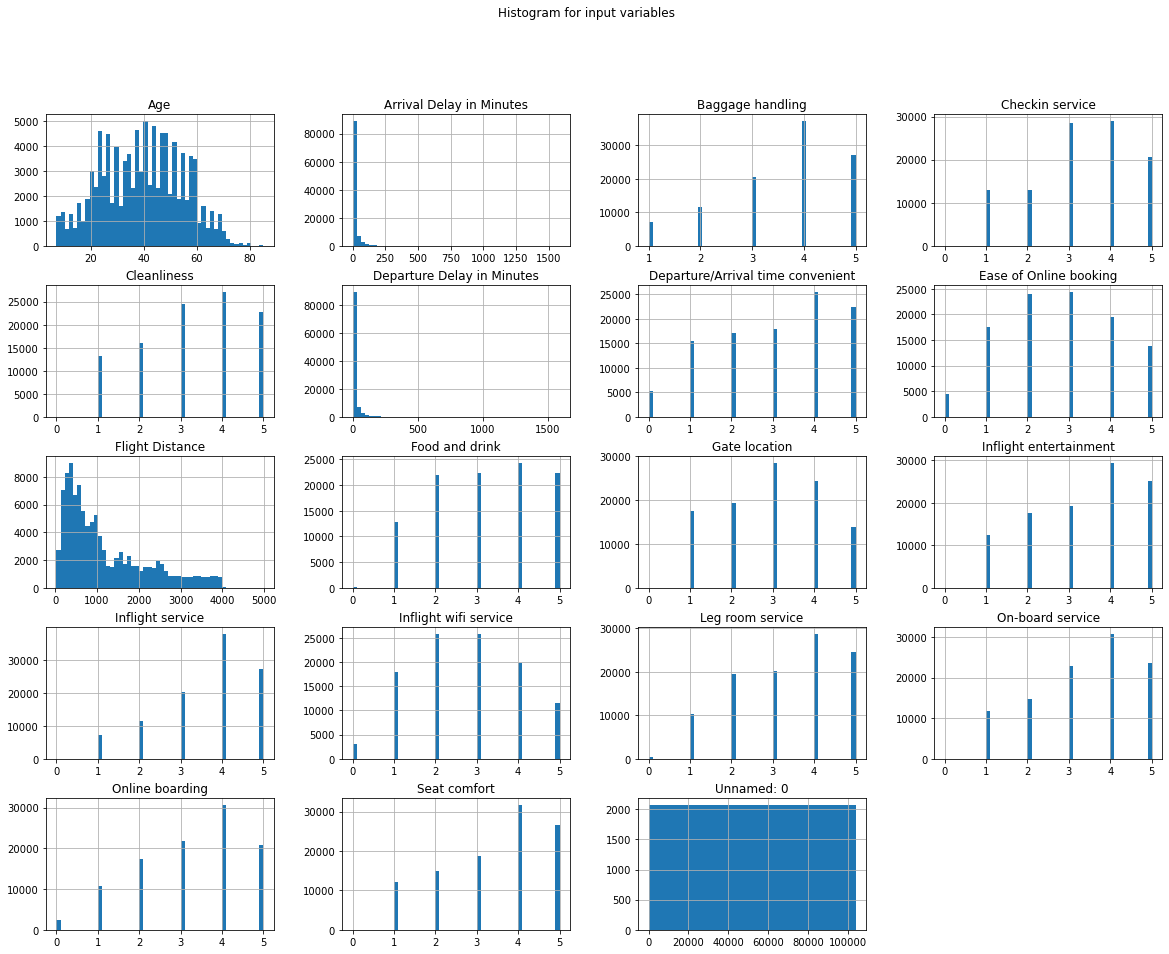

In [ ]:
import pylab as pl
dataset.drop(['id', 'Customer Type', 'Type of Travel', 'Class', 'Buy ticket in future', ],
            axis = 1).hist(bins = 50, figsize = (20,15))
pl.suptitle("Histogram for input variables")
plt.savefig('data_histogram')
plt.show()

In [ ]:
def gender_transform(x):
    if x == 'Female':
        return 1
    elif x == 'Male':
        return 0
    else:
        return -1



In [ ]:
def class_transform(x):
    if x == 'Business':
        return 2
    elif x == 'Eco Plus':
        return 1
    elif x == 'Eco':
        return 0
    else:
        return -1


In [ ]:
def buy_ticket_transform(x):
    if x == 'Yes':
        return 1
    elif x == 'No':
        return 0
    else:
        return -1

In [ ]:
def transform_data(data):
    data = data.drop(['Unnamed: 0', 'id', 'Customer Type', 'Type of Travel',
                     'Departure/Arrival time convenient', 'Gate location', 'Leg room service'], axis = 1)
    data['Gender'] = data['Gender'].apply(gender_transform)
    data['Buy ticket in future'] = data['Buy ticket in future'].apply(buy_ticket_transform)
    data['Class'] = data['Class'].apply(class_transform)
    data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median(), inplace = True)
    return data

dataset = transform_data(dataset)


In [ ]:
dataset.head()

,Gender,Age,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Buy ticket in future
0,0,13,1,460,3,3,5,3,5,5,4,4,4,5,5,25,18.0,0
1,0,25,2,235,3,3,1,3,1,1,1,3,1,4,1,1,6.0,0
2,1,26,2,1142,2,2,5,5,5,5,4,4,4,4,5,0,0.0,1
3,1,25,2,562,2,5,2,2,2,2,2,3,1,4,2,11,9.0,0
4,0,61,2,214,3,3,4,5,5,3,3,4,3,3,3,0,0.0,1


In [ ]:
dataset.info

<bound method DataFrame.info of         Gender  Age  Class  Flight Distance  Inflight wifi service  \
0            0   13      1              460                      3   
1            0   25      2              235                      3   
2            1   26      2             1142                      2   
3            1   25      2              562                      2   
4            0   61      2              214                      3   
...        ...  ...    ...              ...                    ...   
103899       1   23      0              192                      2   
103900       0   49      2             2347                      4   
103901       0   30      2             1995                      1   
103902       1   22      0             1000                      1   
103903       0   27      2             1723                      1   

        Ease of Online booking  Food and drink  Online boarding  Seat comfort  \
0                            3               5

In [ ]:
feature_names = ['Gender', 'Age', 'Class', 'Flight Distance', 'Inflight wifi service', 'Ease of Online booking', 
                 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 
                 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 
                 'Arrival Delay in Minutes', 'Arrival Delay in Minutes']
target = ['Buy ticket in future']

#features
x = dataset[feature_names] 
#target
y = dataset[target] 


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)


In [ ]:
print("x_train: ", x_train)
print("x_test:", x_test)
print("y_train:", y_train)
print("y_test:", y_test)


x_train:         Gender  Age  Class  Flight Distance  Inflight wifi service  \
54759       1   63      1              371                      4   
28103       1   37      2             2401                      2   
5463        1   51      0              651                      5   
12812       1   40      0              532                      1   
57417       0   24      0              948                      2   
...       ...  ...    ...              ...                    ...   
21243       1   46      0              235                      5   
45891       0   50      2             1428                      3   
42613       0   19      0              493                      5   
43567       1   69      0              925                      2   
68268       1   32      0              352                      3   

       Ease of Online booking  Food and drink  Online boarding  Seat comfort  \
54759                       4               1                3             4   
2

In [ ]:
print("train:", x_train.shape)


train: (77928, 18)


In [ ]:
print("test:", x_test.shape)


test: (25976, 18)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
x_train = scaling.fit_transform(x_train)
x_test = scaling.fit_transform(x_test)


In [ ]:
print(x_train)

[[ 0.98643832  1.55999611 -0.02624329 ... -0.39007055 -0.39397522
  -0.39397522]
 [ 0.98643832 -0.15660962  1.01239939 ... -0.39007055 -0.39397522
  -0.39397522]
 [ 0.98643832  0.76771654 -1.06488597 ... -0.36372098 -0.39397522
  -0.39397522]
 ...
 [-1.01374813 -1.34502897 -1.06488597 ... -0.39007055 -0.39397522
  -0.39397522]
 [ 0.98643832  1.9561359  -1.06488597 ... -0.39007055 -0.39397522
  -0.39397522]
 [ 0.98643832 -0.48672611 -1.06488597 ... -0.39007055 -0.39397522
  -0.39397522]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier().fit(x_train, y_train)


In [ ]:
y_pred = classifier.predict(x_test)


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


[[13644  1090]
 [ 1012 10230]]


In [ ]:
print('Accuracy of Decision Tree classifier on training set:', classifier.score(x_train, y_train))
print('Accuracy of Decision Tree classifier on test set:', classifier.score(x_test, y_test))


Accuracy of Decision Tree classifier on training set: 1.0
Accuracy of Decision Tree classifier on test set: 0.9190791499846012


In [ ]:
print('Accuracy_score', sklearn.metrics.accuracy_score(y_test, y_pred))


Accuracy_score 0.9190791499846012


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     14734
           1       0.90      0.91      0.91     11242

    accuracy                           0.92     25976
   macro avg       0.92      0.92      0.92     25976
weighted avg       0.92      0.92      0.92     25976



In [ ]:
print(confusion_matrix(y_test, y_pred))




[[13644  1090]
 [ 1012 10230]]


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     14734
           1       0.90      0.91      0.91     11242

    accuracy                           0.92     25976
   macro avg       0.92      0.92      0.92     25976
weighted avg       0.92      0.92      0.92     25976

0.9190791499846012


In [ ]:
print(confusion_matrix(y_test, y_pred))


[[13644  1090]
 [ 1012 10230]]


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     14734
           1       0.90      0.91      0.91     11242

    accuracy                           0.92     25976
   macro avg       0.92      0.92      0.92     25976
weighted avg       0.92      0.92      0.92     25976

0.9190791499846012


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     14734
           1       0.90      0.91      0.91     11242

    accuracy                           0.92     25976
   macro avg       0.92      0.92      0.92     25976
weighted avg       0.92      0.92      0.92     25976



In [ ]:
from sklearn.ensemble import RandomForestClassifier
#fine Tuning the model using GridSearchCV

In [ ]:
n_estimators =[int(x) for x in np.linspace(start =10, stop = 80, num = 10)]
max_features = ['auto', 'sqrt']
max_depth =[2, 4]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

In [ ]:
param_grid ={'n_estimators': n_estimators,
            'max_features':max_features,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            'bootstrap': bootstrap}
print(param_grid)


{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv =3, verbose =2, n_jobs =4)

In [ ]:
rf_Grid.fit(x_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   29.4s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  5.1min
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  8.5min
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed: 13.7min finished
/Users/finestcash2016/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [ ]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 56}

In [ ]:
print(f'Train Accuracy -: {rf_Grid.score(x_train,y_train):.3f}')
print(f'Test Accuracy -: {rf_Grid.score(x_test,y_test):.3f}' )      

Train Accuracy -: 0.886
Test Accuracy -: 0.885
